Figures will be saved in: c:\Users\kumar\OneDrive\Desktop\Pm accelerator\weather-trend-forecast\reports\figures
Loaded cleaned dataset: (97629, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715849e+09,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1.0,1.0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55.0
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1.715849e+09,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.1,2.0,1.0,1.0,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55.0
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1.715849e+09,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.4,18.4,1.0,1.0,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55.0
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1.715849e+09,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.7,0.9,1.0,1.0,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55.0
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1.715849e+09,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.4,262.3,5.0,10.0,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55.0


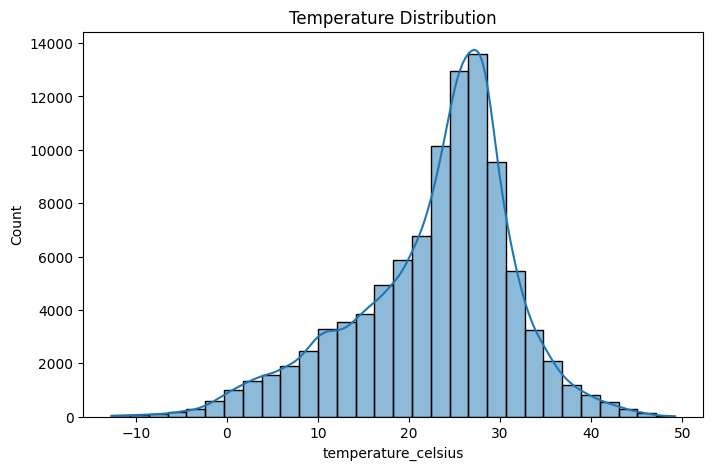

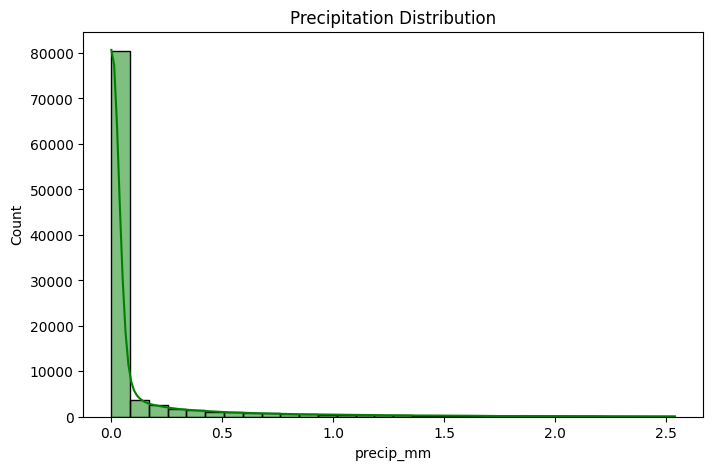

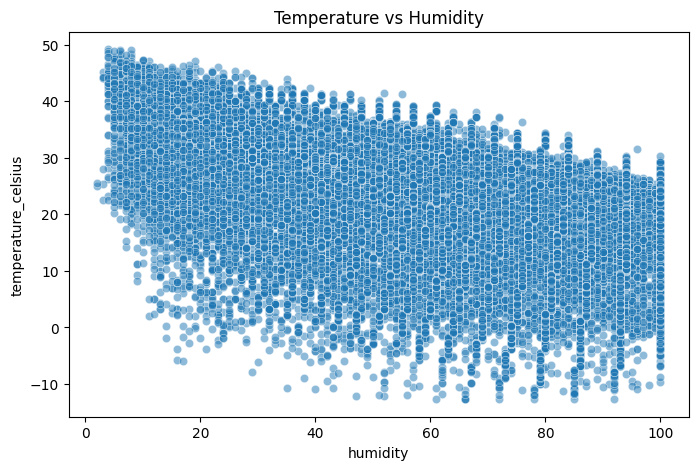

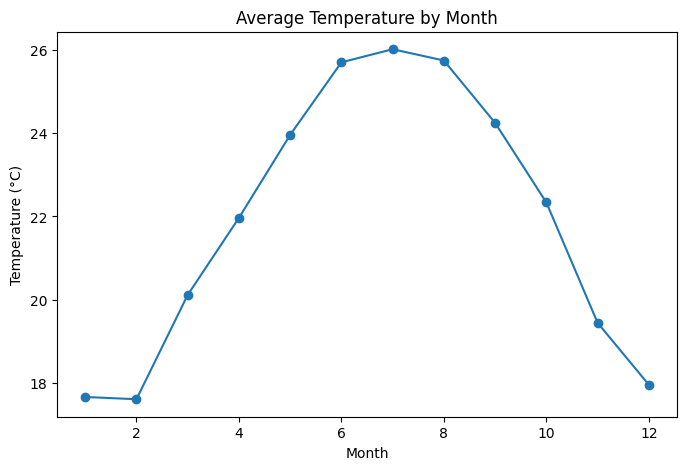

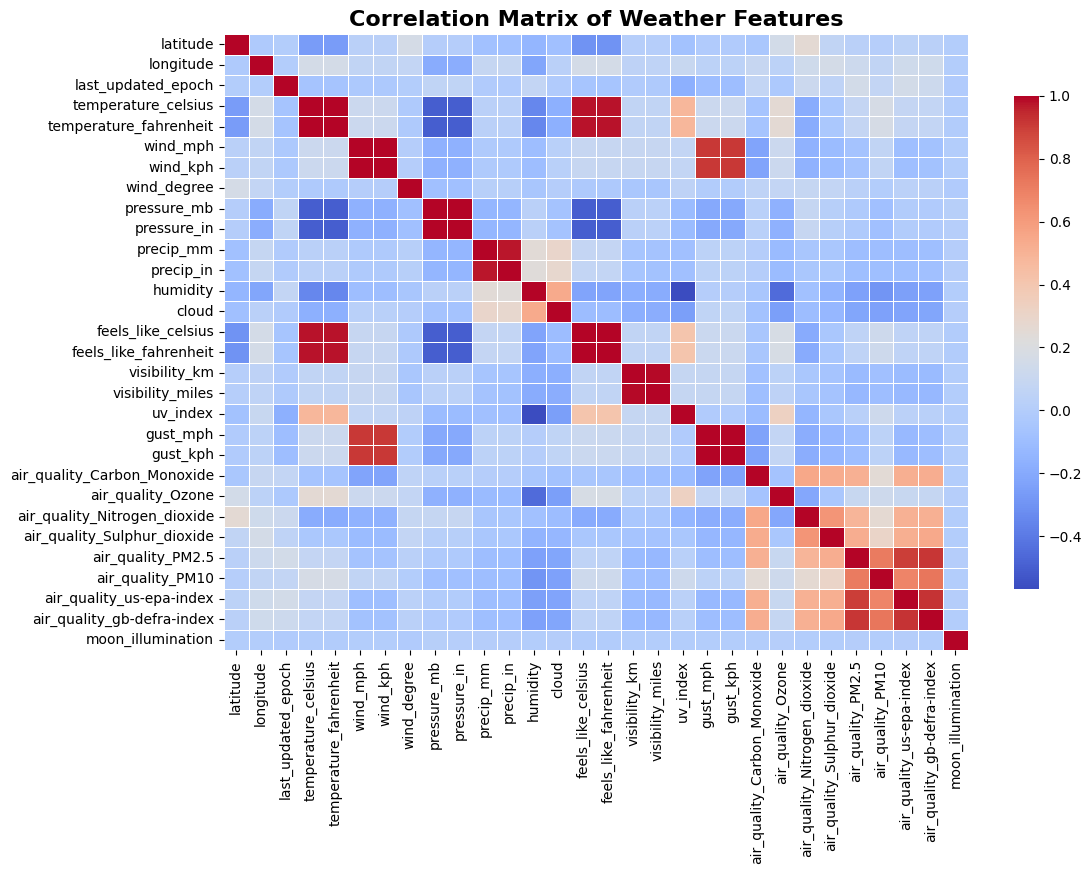

In [1]:
# ============================================================
# Weather Trend Forecasting: 03 EDA & Visualization
# ============================================================

# ---------------------------
# Step 0: Imports & Setup
# ---------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Figures folder (inside reports/figures as per structure)
figures_dir = os.path.join(project_root, "reports", "figures")
os.makedirs(figures_dir, exist_ok=True)
print(f"Figures will be saved in: {figures_dir}")

# ---------------------------
# Step 1: Load cleaned data
# ---------------------------
cleaned_csv_path = os.path.join(project_root, "data", "processed", "weather_cleaned.csv")
df = pd.read_csv(cleaned_csv_path)

print(f"Loaded cleaned dataset: {df.shape}")
display(df.head())

# ---------------------------
# Step 2: Exploratory Visualizations
# ---------------------------

# 2a. Temperature Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True)
plt.title("Temperature Distribution")
fig_path = os.path.join(figures_dir, "temperature_distribution.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# 2b. Precipitation Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['precip_mm'], bins=30, kde=True, color='green')
plt.title("Precipitation Distribution")
fig_path = os.path.join(figures_dir, "precipitation_distribution.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# 2c. Temperature vs Humidity Scatter
plt.figure(figsize=(8,5))
sns.scatterplot(x='humidity', y='temperature_celsius', data=df, alpha=0.5)
plt.title("Temperature vs Humidity")
fig_path = os.path.join(figures_dir, "temp_vs_humidity.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# 2d. Monthly Average Temperature
df['month'] = pd.to_datetime(df['last_updated']).dt.month
monthly_avg_temp = df.groupby('month')['temperature_celsius'].mean()
plt.figure(figsize=(8,5))
monthly_avg_temp.plot(kind='line', marker='o')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
fig_path = os.path.join(figures_dir, "avg_temp_by_month.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# ---------------------------
# Step 3: Correlation Matrix
# ---------------------------
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            cmap="coolwarm", 
            annot=False, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Weather Features", fontsize=16, weight="bold")
fig_path = os.path.join(figures_dir, "correlation_matrix.png")
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
plt.show()
